# Introducción al Deep Learning
## Redes neuronales con Keras: Una primera aproximación

### Propósito

Por medio de este laboratorio, se pretende hacer una introducción al uso de Keras y TensorFlow, entrenando una red neuronal, evaluando su desempeño y visualizando los resultados.

### Instrucciones generales

1. Para realizar la actividad solo siga las indicaciones asociadas a cada celda del notebook. Sin embargo, siéntase libre de modificar el archivo editando las celdas, lo que le permitirá afianzar su comprensión sobre las distintas funcionalidades de código.  

2. Recuerde que para esta actividad NO necesita realizar ningún tipo de entrega.

### Librerías a importar

A continuación se muestran los comandos a ejecutar para poder implementar los procedimientos de este notebook:


In [1]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
from matplotlib import pyplot  as plt
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

### Carga y separación de datos 

En primer lugar, cargamos los datos a usar en este notebook que corresponden a una base de datos del _National Institute of Diabetes and Digestive and Kidney Diseases_. La variable de interés 'Clase' es una variable binaria toma el valor de 1 en caso de que el paciente tenga diabetes o de 0 en caso contrario. Por su parte, se tienen las siguientes variables explicativas:

1. Número de veces en embarazo
2. Concentración de glucosa a 2 horas de test de tolerancia
3. Presión sanguínea diastólica
4. Grosor de pliegue de triceps
5. Insulina 2 horas
6. Índice de masa corporal
7. Función de pedigree de diabetes 
8. Edad

In [2]:
# Cargar los datos
dataset = pd.read_csv('test2.csv', sep=",")
dataset

,Pregnant_times,Glucose,Bpressure,Triceps,Insulin,BMI,DiabetesFun,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Luego, partimos la base de datos en una sección de train y otra de test de la siguiente manera: utilizaremos el 80% de los datos para entrenamiento y el 20% restante para evaluación.

In [3]:
# Dividir muestra en set de train y test
dataset=dataset.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

## Modelo de red neuronal

### Creación de la red

Para solucionar este problema de clasificación, emplearemos un modelo de red neuronal secuencial de tipo _feedforward_. Para ello, creamos el objeto y procedemos a añadir cada una de las capas, especificando el número de neuronas y la función de activación en cada caso.

In [4]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

### Visualización 
Podemos visualizar nuestra red con ayuda de funciones como _plot_model( )_ o _ann_viz_( ):

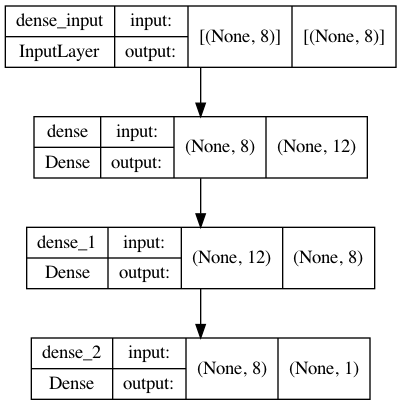

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
from ann_visualizer.visualize import ann_viz
# Generar un archivo con la visualización de la red neuronal (se aprecian los nodos en cada capa).
# Este archivo se descarga en el directorio en el que se está trabajando este notebook y puede visualizarse en pdf
ann_viz(model, title="Neural Network", filename="NN_S2LSC1.gv") 

### Compilación del modelo 

Con la función [_compile( )_](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential), configuramos nuestra red para entrenarla. Definimos entonces la [función de pérdida](https://www.tensorflow.org/api_docs/python/tf/keras/losses), el [optimizador](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) y las [métricas](https://www.tensorflow.org/api_docs/python/tf/keras/metrics) a evaluar del modelo durante el entrenamiento y prueba. Para este caso, se seleccionó la función de entropía cruzada, el optimizador Adam y el _Accuracy_ como métrica.

In [7]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Entrenamiento del modelo 
Entrenamos nuestra red neuronal con los datos de entrenamiento. Podemos evidenciar el valor de la función de pérdida y el accuracy del modelo para cada epoch.

In [8]:
history=model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 1s 2ms/step - loss: 16.8866 - accuracy: 0.3502
Epoch 2/150
62/62 [==============================] - 0s 3ms/step - loss: 1.5768 - accuracy: 0.5749
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8152 - accuracy: 0.6173
Epoch 4/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7461 - accuracy: 0.6368
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7158 - accuracy: 0.6401
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7044 - accuracy: 0.6384
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6876 - accuracy: 0.6792
Epoch 8/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.6726
Epoch 9/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6705 - accuracy: 0.6564
Epoch 10/150
62/62 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.6401
Epoch 11

62/62 [==============================] - 0s 2ms/step - loss: 0.5344 - accuracy: 0.7427
Epoch 84/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5334 - accuracy: 0.7427
Epoch 85/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5385 - accuracy: 0.7427
Epoch 86/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7622
Epoch 87/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5222 - accuracy: 0.7524
Epoch 88/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5203 - accuracy: 0.7590
Epoch 89/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5437 - accuracy: 0.7378
Epoch 90/150
62/62 [==============================] - 0s 3ms/step - loss: 0.5197 - accuracy: 0.7476
Epoch 91/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7362
Epoch 92/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5192 - accuracy: 0.7590
Epoch 93/150


La anterior información también puede ser presentada gráficamente:

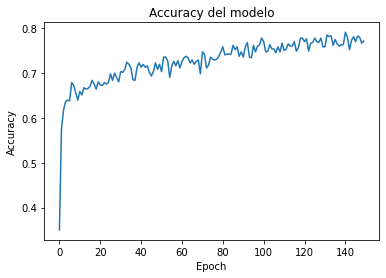

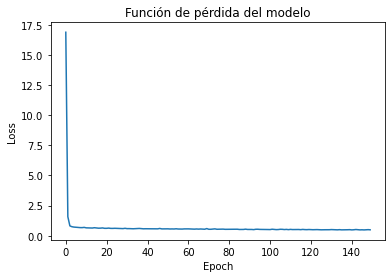

In [9]:
# Graficar accuracy del modelo
plt.plot(history.history['accuracy'])
plt.title('Accuracy del modelo')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()
# Graficar la función de pérdida evaluada
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

Calculamos el _accuracy_ del modelo para el set de train:

In [10]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

20/20 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7915
Accuracy: 79.15


### Evaluación del modelo
Podemos evaluar nuestro modelo con ayuda de la función _evaluate( )_ que retorna la función de pérdida y la métrica seleccionada (el _accuracy_ en este caso) dados los datos de prueba:

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.5660 - accuracy: 0.7338


Finalmente, podemos hacer predicciones sobre los datos de test utilizando el modelo y a partir de ello calcular otras métricas relevantes:

El accuracy del modelo es: 0.7337662337662337
La precisión del modelo es: 0.6363636363636364
La matriz de confusión es: [[85 16]
 [25 28]]
El AUC del modelo es: 0.737903979077153


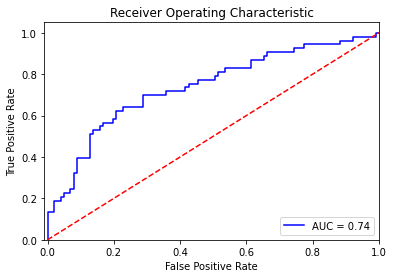

In [12]:
# Hallar probabilidades y clasificación que predice el modelo con threshold de 0.5
predicciones = model.predict(X_test)
y_pred = [round(x[0]) for x in predicciones]
# Imprimir métricas de desempeño
print("El accuracy del modelo es: "+str(accuracy_score(y_true=y_test, y_pred=y_pred)))
print("La precisión del modelo es: "+str(precision_score(y_true=y_test, y_pred=y_pred)))
print("La matriz de confusión es: "+str(confusion_matrix(y_true=y_test, y_pred=y_pred)))
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicciones, pos_label=1)
AUCRegLog=metrics.auc(fpr, tpr)
print("El AUC del modelo es: "+str(AUCRegLog))
# Graficar curva ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRegLog)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()